In [1]:
import sys 
sys.path.append('../')
from models.keras import ModelFactory
class_names=['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia' ]

Using TensorFlow backend.


In [2]:
model_factory = ModelFactory()
model = model_factory.get_model(
    class_names=class_names,
    model_name='DenseNet121',
    use_base_weights=False,
    weights_path="../weights/brucechou1983_CheXNet_Keras_0.3.0_weights.h5")

load model weights_path: ../weights/brucechou1983_CheXNet_Keras_0.3.0_weights.h5


In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [4]:
import generator as gen
from importlib import reload
import glob
img_list = glob.glob('../../../data/*.png')
img_list[:10]

['../../../data/ce13294e-e01d-4074-86dc-0dd747226a5c.png',
 '../../../data/4ae315a5-733e-4de7-9f29-a095134382cb.png',
 '../../../data/34033f0c-2a11-41f0-bd6b-116d3a2c3495.png',
 '../../../data/4c2e071e-d217-42fa-9c9b-e3931974bd8d.png',
 '../../../data/4005e782-c12e-4657-9b29-1707ee6eb08a.png',
 '../../../data/01b9e362-4950-40f5-88fa-7557ac2a45bb.png',
 '../../../data/41a42062-6911-4f89-ac12-ea7829d0466d.png',
 '../../../data/a228d0c7-b6aa-409d-98df-569809daa353.png',
 '../../../data/09c48ba8-4f0b-483c-85ec-9246d7cc6177.png',
 '../../../data/6404bc57-dd68-4931-836b-8246d1e6cf14.png']

In [10]:
import numpy as np
reload(gen)
results = []
batch_size = 256
batches = (len(img_list) // batch_size) +1
for idx in range(batches):
    print (f"Batch: {idx*batch_size}:{(idx+1)*batch_size}\t{idx}:{batches}")
    imgs = [gen.load_image(file) for file in img_list[idx*batch_size:(idx+1)*batch_size]]
    X = gen.transform_batch_images(imgs)
    y = model.predict(X,  batch_size=64, verbose=1)
    results.append(y)


Batch: 0:256	0:105


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


256/256 [==============================] - 5s 20ms/step
Batch: 256:512	1:105
256/256 [==============================] - 1s 6ms/step
Batch: 512:768	2:105
256/256 [==============================] - 2s 6ms/step
Batch: 768:1024	3:105
256/256 [==============================] - 1s 6ms/step
Batch: 1024:1280	4:105
256/256 [==============================] - 1s 5ms/step
Batch: 1280:1536	5:105
256/256 [==============================] - 2s 6ms/step
Batch: 1536:1792	6:105
256/256 [==============================] - 2s 6ms/step
Batch: 1792:2048	7:105
256/256 [==============================] - 2s 6ms/step
Batch: 2048:2304	8:105
256/256 [==============================] - 2s 6ms/step
Batch: 2304:2560	9:105
256/256 [==============================] - 2s 6ms/step
Batch: 2560:2816	10:105
256/256 [==============================] - 2s 6ms/step
Batch: 2816:3072	11:105
256/256 [==============================] - 2s 6ms/step
Batch: 3072:3328	12:105
256/256 [==============================] - 2s 6ms/step
Batch: 332

In [15]:
imgs = [gen.load_image(file) for file in img_list[:1000]]
X = gen.transform_batch_images(imgs)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [18]:
import numpy as np
X[:,:,0].mean(), np.array(imgs)[:,:,2].mean()

(-0.5471876435159192, 0.312286692444835)

In [15]:
y[y.argmax(axis=1) == 3].shape

(26684, 14)

In [19]:
%matplotlib inline


In [ ]:
import PIL 
PIL.Image.fromarray(np.uint8(img_matrix))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


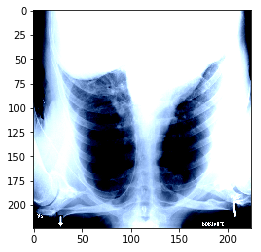

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


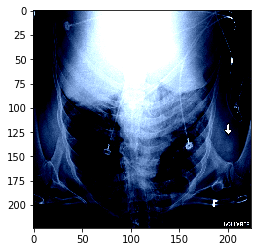

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


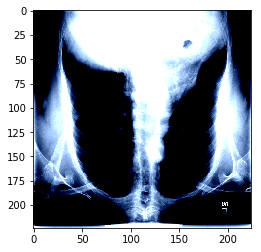

In [25]:
import matplotlib.pyplot as plt
plt.imshow(X[0,:])
plt.show()
plt.imshow(X[1,])
plt.show()
plt.imshow(X[2,])
plt.show()